In [4]:
import numpy as np
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [7]:
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [9]:
### 데이터 전처리
# - 입력 x 와 결과 y 분리
# - 훈련, 검증, 테스터, 데이터 분리
print(dataset[0][0])

6.0


In [10]:
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [11]:
x = dataset[:,0:8]
y=dataset[:,8]

x_train = x[:600] #600개는 학습데이터이다
y_train = y[:600]
x_val=x[600:700]  #100개는 검증데이터이다
y_val=y[600:700]
x_test = x[700:]  # 68개는 테스트데이터이다
y_test = y[700:]

In [12]:
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [13]:
model = Sequential()
model.add(Dense(units=250, input_dim=8, activation='elu'))
model.add(Dense(units=100, activation='elu'))
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=20) # 조기종료 콜백함수 정의
hist = model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])


Train on 600 samples, validate on 100 samples
Epoch 1/50
600/600 [==============================] - 0s 488us/sample - loss: 3.2719 - accuracy: 0.5683 - val_loss: 1.7304 - val_accuracy: 0.7400
Epoch 2/50
600/600 [==============================] - 0s 144us/sample - loss: 1.8027 - accuracy: 0.6317 - val_loss: 1.2563 - val_accuracy: 0.5400
Epoch 3/50
600/600 [==============================] - 0s 146us/sample - loss: 1.5519 - accuracy: 0.6550 - val_loss: 0.4731 - val_accuracy: 0.7900
Epoch 4/50
600/600 [==============================] - 0s 118us/sample - loss: 0.9615 - accuracy: 0.7100 - val_loss: 0.8478 - val_accuracy: 0.6500
Epoch 5/50
600/600 [==============================] - 0s 129us/sample - loss: 0.7988 - accuracy: 0.7117 - val_loss: 0.8060 - val_accuracy: 0.7100
Epoch 6/50
600/600 [==============================] - 0s 150us/sample - loss: 1.0543 - accuracy: 0.6800 - val_loss: 0.9035 - val_accuracy: 0.6100
Epoch 7/50
600/600 [==============================] - 0s 108us/sample - loss: 

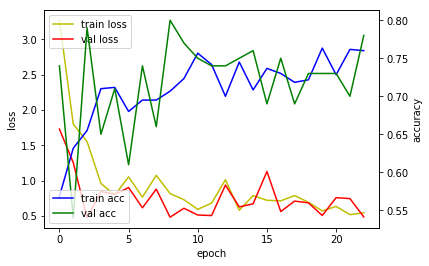

In [15]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [16]:
#test data
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : '+str(loss_and_metrics[0]))
print('accuray : '+str(loss_and_metrics[1]))

68/68 [==============================] - 0s 0s/sample - loss: 0.6611 - accuracy: 0.7353

loss : 0.6610623948714313
accuray : 0.7352941
